# Machine Learning Model for Heart Disease Prediction 
#### This notebook creates a Machine Learning model which would be capable of predicting weather a person can have a heart disease or not, based on the given medical information 

## What is Heart Disease?

Heart disease describes a range of conditions that affect your heart. Heart diseases include:

* Blood vessel disease, such as coronary artery disease
* Heart rhythm problems (arrhythmias)
* Heart defects you're born with (congenital heart defects)
* Heart valve disease
* Disease of the heart muscle
* Heart infection
Many forms of heart disease can be prevented or treated with healthy lifestyle choices.

## About Dataset

https://www.kaggle.com/johnsmith88/heart-disease-dataset

### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


### Content
Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from lightgbm import LGBMClassifier

### Importing Dataset

In [4]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

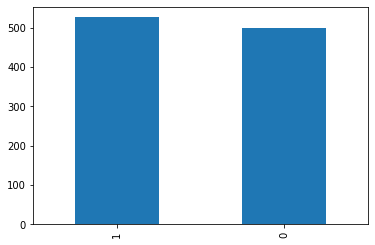

In [ ]:
df.target.value_counts().plot(kind="bar")#this shows that our dataset is balanced!

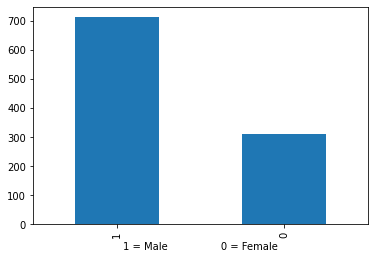

In [ ]:
df.sex.value_counts().plot(kind="bar")
plt.xlabel("1 = Male                 0 = Female");

Text(0.5, 0, 'Type of Chest pain')

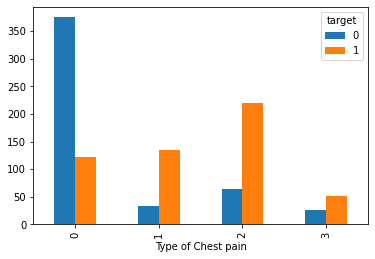

In [ ]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar");
plt.xlabel("Type of Chest pain")

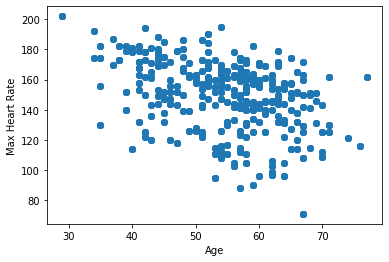

In [ ]:
plt.scatter(df.age,df.thalach);
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

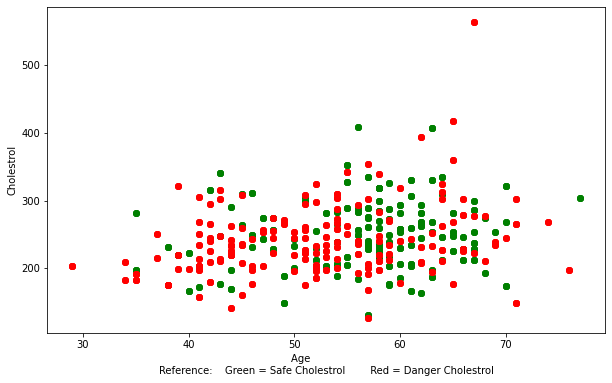

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 0],df.chol[df.target == 0],c="g")
plt.scatter(df.age[df.target == 1],df.chol[df.target == 1],c="r")
plt.xlabel("Age                \nReference:    Green = Safe Cholestrol        Red = Danger Cholestrol")
plt.ylabel("Cholestrol");

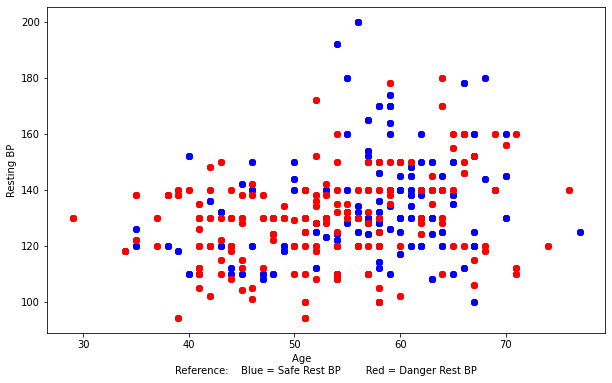

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],df.trestbps[df.target==0],c="b")
plt.scatter(df.age[df.target==1],df.trestbps[df.target==1],c="r")
plt.xlabel("Age                \nReference:    Blue = Safe Rest BP        Red = Danger Rest BP")
plt.ylabel("Resting BP");

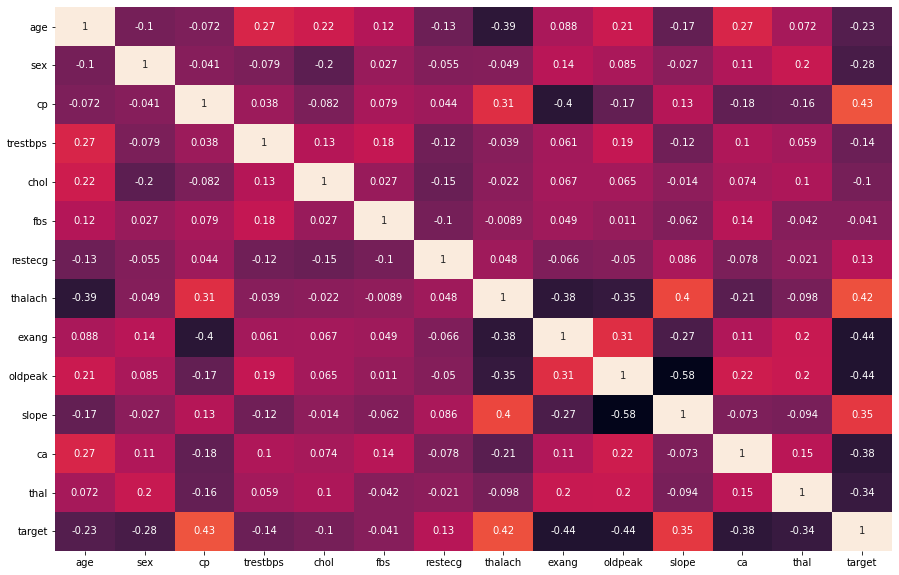

In [ ]:
corre = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corre,annot=True,cbar=False);

### Splitting our data into Train and Test

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(["target",],axis=1)
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10) 
X_train.shape,X_test.shape

((820, 13), (205, 13))

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#scaled_X_train = sc.fit_transform(X_train)
#scaled_X_test = sc.transform(X_test)

### Initialising our model

Here we are using lightGBM Classifier in order to train and predict on our dataset.

#### About LGBM:
It is a gradient boosting framework that makes use of tree based learning algorithms that is considered to be a very powerful algorithm when it comes to computation. It is considered to be a fast processing algorithm.

 

While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise. LightGBM chooses the leaf with large loss to grow. It can lower down more loss than a level wise algorithm when growing the same leaf.



In [ ]:
model1 = LGBMClassifier()
model1.fit(X_train,y_train)
model1.score(X_test,y_test) #Accuracy

1.0

### Evaluating the model

In [ ]:
#Classification Report
y_preds = model1.predict(X_test)
print(classification_report(y_true =y_test,y_pred =y_preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       108

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



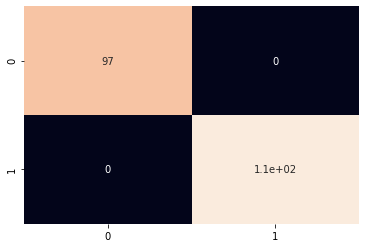

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot=True,cbar=False);

In [ ]:
#Cross Validation Score
cvs=cross_val_score(model1,X_train,y_train,cv=5,scoring="accuracy")
print("Accuracy = ",np.mean(cvs)*100)


Accuracy =  98.78048780487806


### Feature Importance

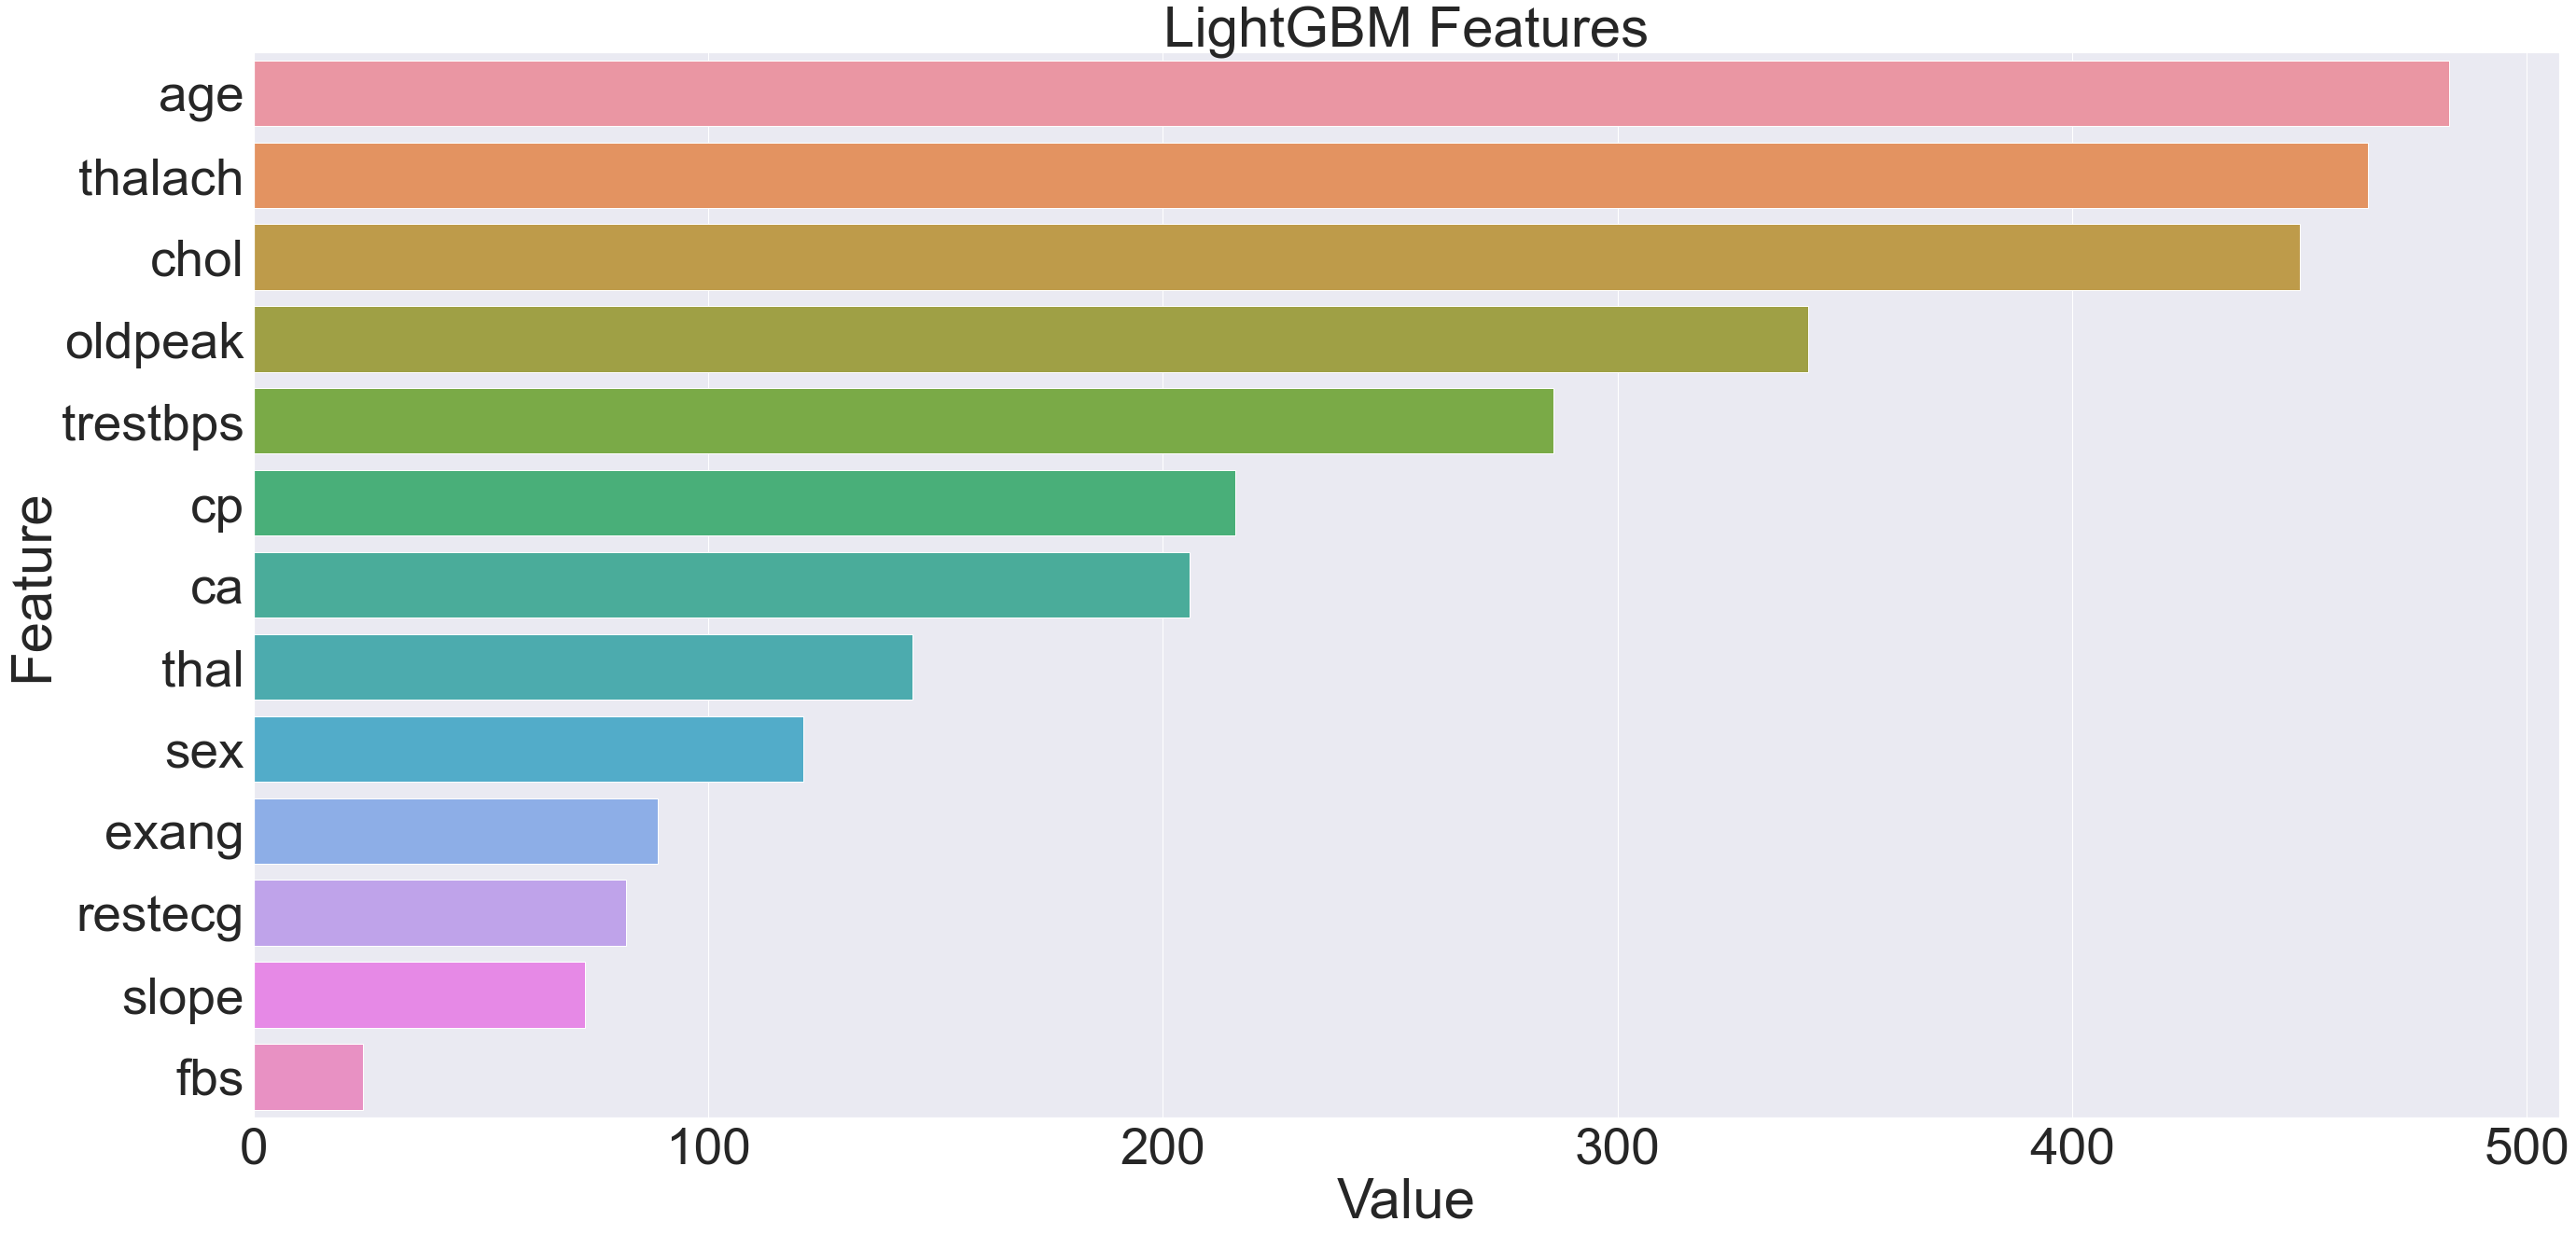

In [ ]:
feature_imp = pd.DataFrame({'Value':model1.feature_importances_,'Feature':X_train.columns})
plt.figure(figsize=(40, 20))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
#plt.savefig('lgbm_importances-01.png')


## Final Model

In [6]:
model = LGBMClassifier()
model.fit(X,y)
model.score(X,y)

1.0

### Save and Load model

In [7]:
import pickle 
pickle.dump(model,open("/content/finalmodel.pkl","wb"))

In [10]:
model_load = pickle.load(open("finalmodel.pkl","rb"))
model_load.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1])